In [ ]:
#https://www.kaggle.com/code/syedali110/heart-disease-detection/input

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
cardio= pd.read_csv("/content/heart.csv")

In [4]:
le = LabelEncoder()
cardio['sex'] = le.fit_transform(cardio['sex'])
cardio['cp'] = le.fit_transform(cardio['cp'])
cardio['fbs'] = le.fit_transform(cardio['fbs'])
cardio['restecg'] = le.fit_transform(cardio['restecg'])
cardio['exang'] = le.fit_transform(cardio['exang'])
cardio['slope'] = le.fit_transform(cardio['slope'])
cardio['thal'] = le.fit_transform(cardio['thal'])
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
X = cardio.iloc[:,:-1].values
y = cardio.iloc[:,13].values

In [6]:
cardio.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38)

In [22]:
from sklearn import tree

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier
classificador_arvore = tree.DecisionTreeClassifier()
classificador_arvore.fit(X_train,y_train)

DecisionTreeClassifier()

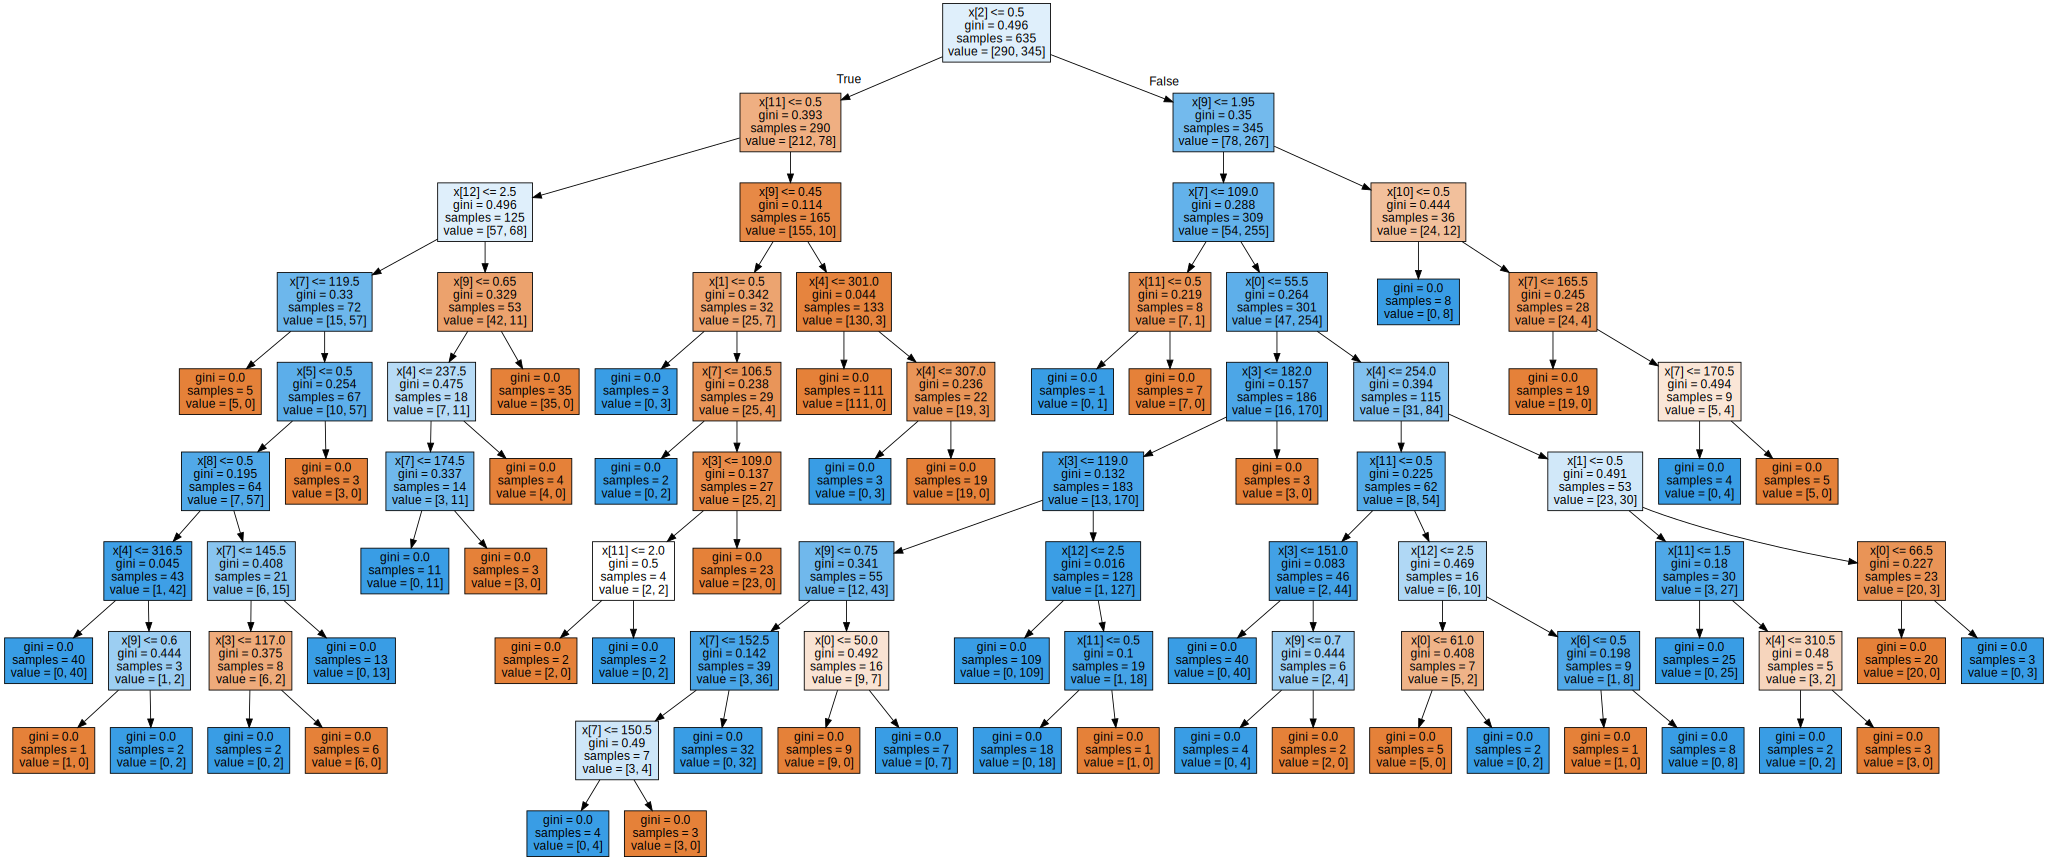

In [25]:
#Visualizando a árvore criada
import graphviz
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [26]:
y_pred = classificador_arvore.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9692307692307692


In [28]:
from sklearn import metrics

In [29]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_test , y_pred, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test , y_pred, labels = [1, 0]))

Confusion Matrix
[[181   0]
 [ 12 197]]

Classification Report
              precision    recall  f1-score   support

           1       0.94      1.00      0.97       181
           0       1.00      0.94      0.97       209

    accuracy                           0.97       390
   macro avg       0.97      0.97      0.97       390
weighted avg       0.97      0.97      0.97       390



<ipython-input-30-579af2147dd6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cardio["target"], bins=30, kde=False)


<Axes: xlabel='target'>

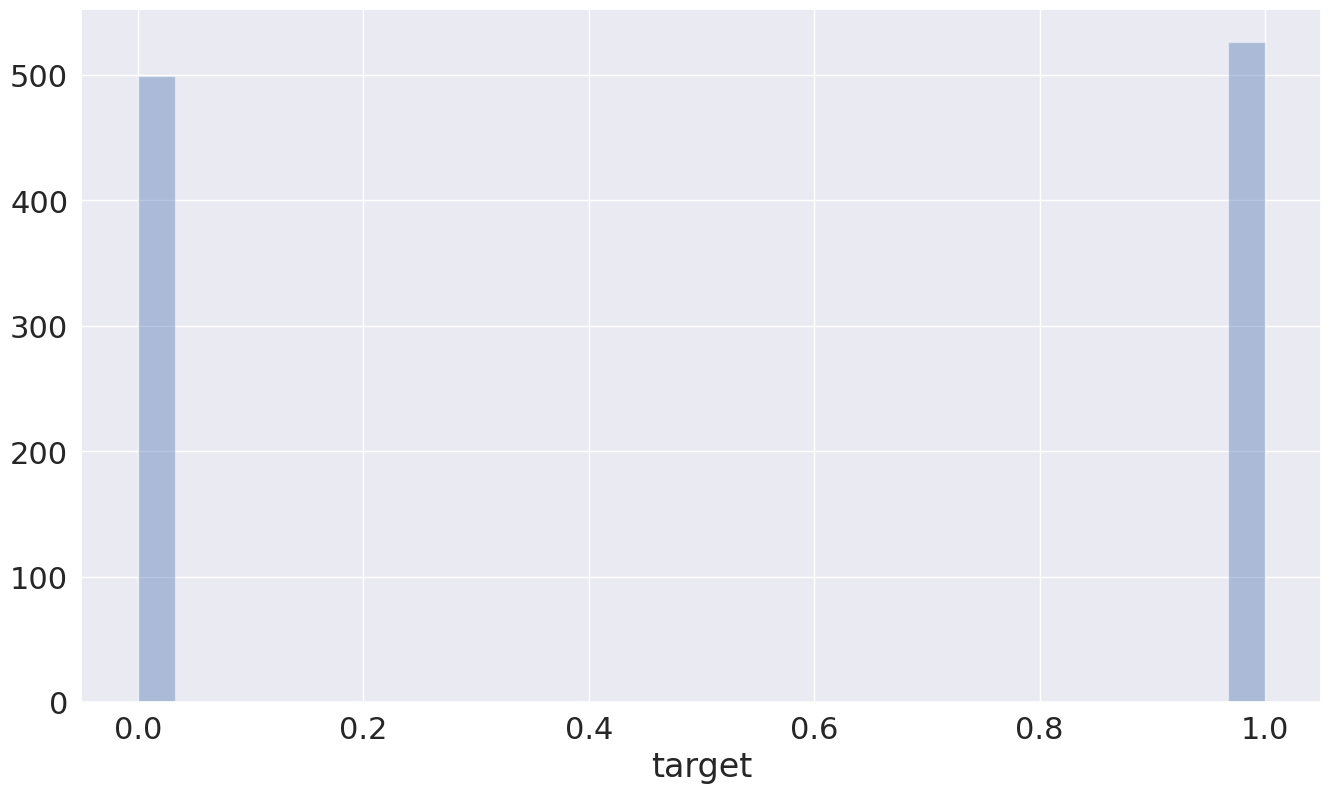

In [30]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(cardio["target"], bins=30, kde=False)